In [75]:
#import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import GroupShuffleSplit
import numpy as np

In [110]:
#read in data
df=pd.read_csv('data/parkinsons_updrsdata.csv')
print(df.head())
print(df.shape)
unique_users = df['subject#'].unique()
print(unique_users)

   subject#  age  sex  test_time  motor_UPDRS  total_UPDRS  Jitter(%)  \
0         1   72    0     5.6431       28.199       34.398    0.00662   
1         1   72    0    12.6660       28.447       34.894    0.00300   
2         1   72    0    19.6810       28.695       35.389    0.00481   
3         1   72    0    25.6470       28.905       35.810    0.00528   
4         1   72    0    33.6420       29.187       36.375    0.00335   

   Jitter(Abs)  Jitter:RAP  Jitter:PPQ5  ...  Shimmer(dB)  Shimmer:APQ3  \
0     0.000034     0.00401      0.00317  ...        0.230       0.01438   
1     0.000017     0.00132      0.00150  ...        0.179       0.00994   
2     0.000025     0.00205      0.00208  ...        0.181       0.00734   
3     0.000027     0.00191      0.00264  ...        0.327       0.01106   
4     0.000020     0.00093      0.00130  ...        0.176       0.00679   

   Shimmer:APQ5  Shimmer:APQ11  Shimmer:DDA       NHR     HNR     RPDE  \
0       0.01309        0.01662      

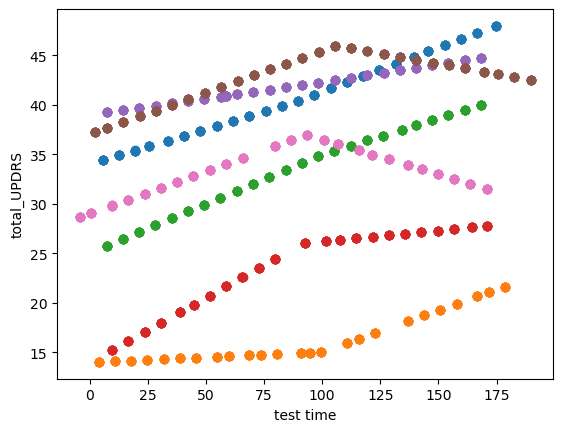

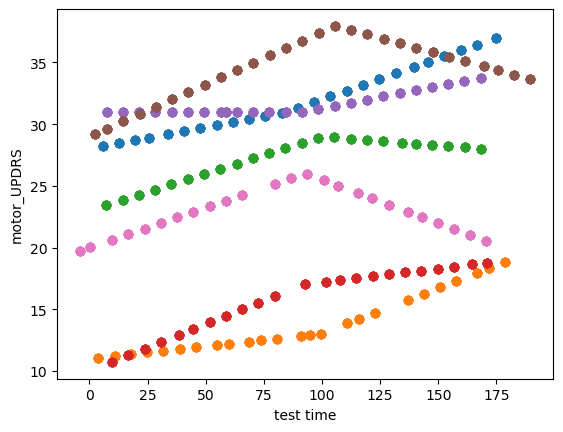

In [111]:
# target and time? imputed measurement
# pick one target?
for i in [1, 2, 3, 4, 5, 41, 42]:
    userone = df[df['subject#'] ==i]
    plt.scatter(userone['test_time'], userone['total_UPDRS'])
    plt.xlabel('test time')
    plt.ylabel('total_UPDRS')

plt.show()

for i in [1, 2, 3, 4, 5, 41, 42]:
    userone = df[df['subject#'] ==i]
    plt.scatter(userone['test_time'], userone['motor_UPDRS'])
    plt.xlabel('test time')
    plt.ylabel('motor_UPDRS')
plt.show()

In [112]:
print(df.dtypes)

subject#           int64
age                int64
sex                int64
test_time        float64
motor_UPDRS      float64
total_UPDRS      float64
Jitter(%)        float64
Jitter(Abs)      float64
Jitter:RAP       float64
Jitter:PPQ5      float64
Jitter:DDP       float64
Shimmer          float64
Shimmer(dB)      float64
Shimmer:APQ3     float64
Shimmer:APQ5     float64
Shimmer:APQ11    float64
Shimmer:DDA      float64
NHR              float64
HNR              float64
RPDE             float64
DFA              float64
PPE              float64
dtype: object


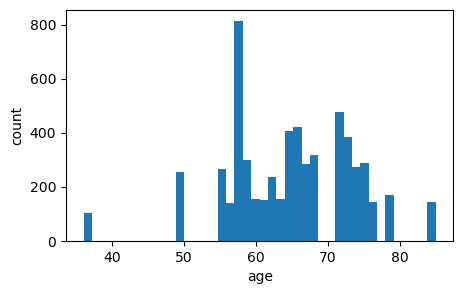

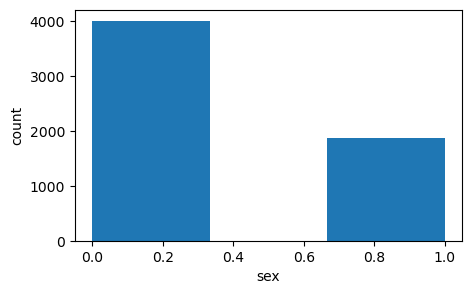

In [113]:
plt.figure(figsize=(5, 3))
plt.hist(df['age'], bins=42)
plt.xlabel("age")
plt.ylabel('count')
plt.show()


plt.figure(figsize=(5, 3))
plt.hist(df['sex'], bins=3)
plt.xlabel("sex")
plt.ylabel('count')
plt.show()

In [114]:
print(df.columns)

Index(['subject#', 'age', 'sex', 'test_time', 'motor_UPDRS', 'total_UPDRS',
       'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP',
       'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE'],
      dtype='object')


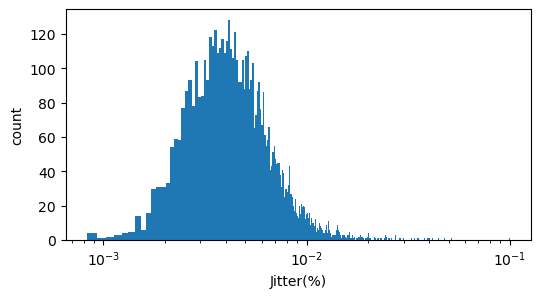

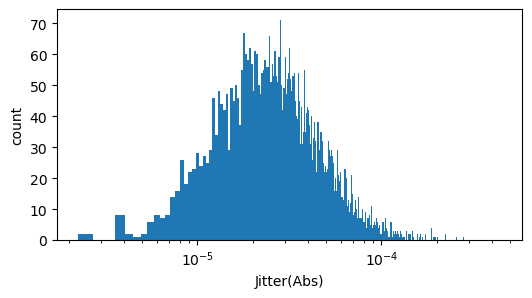

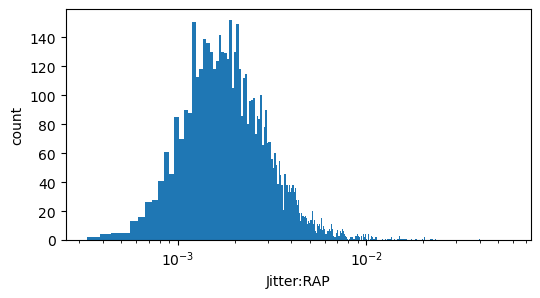

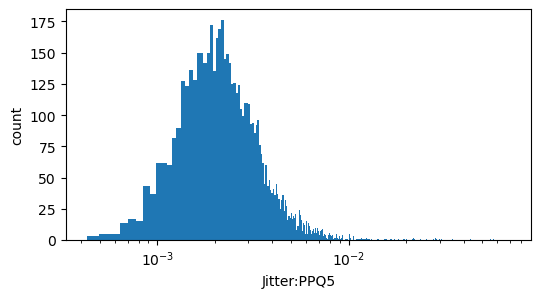

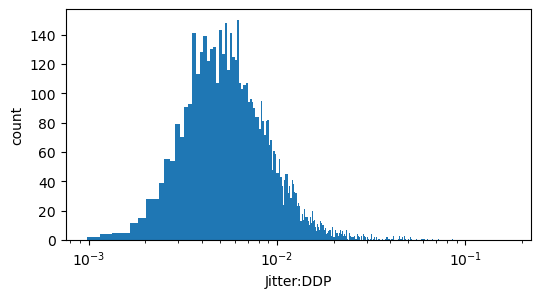

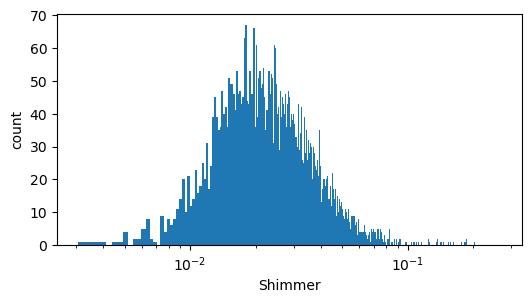

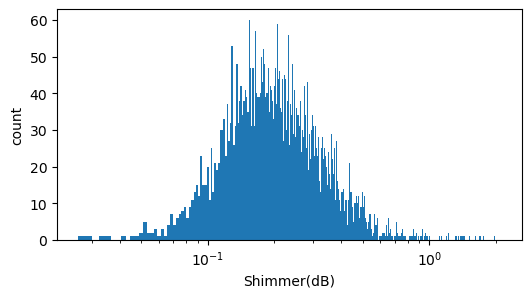

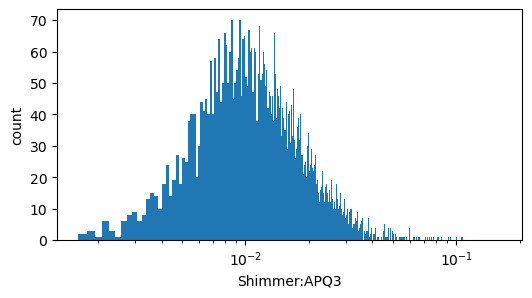

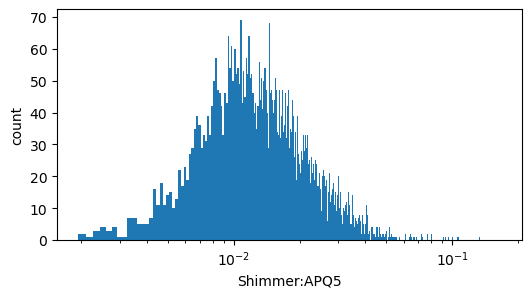

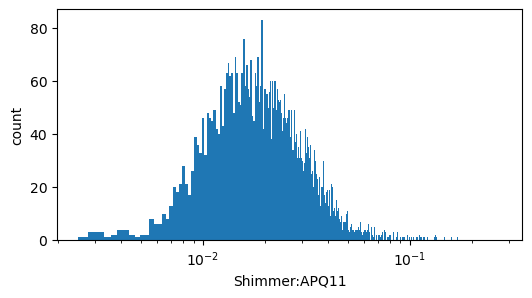

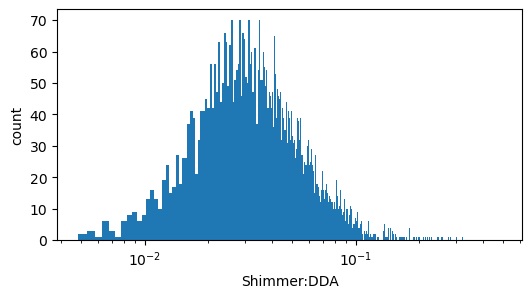

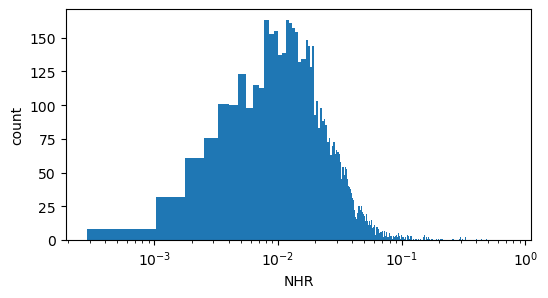

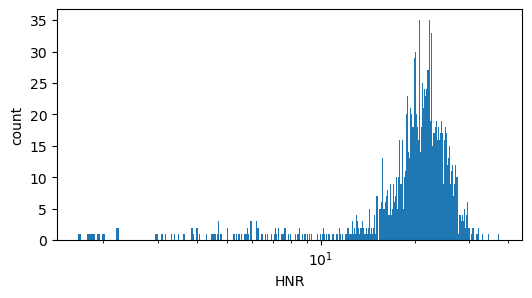

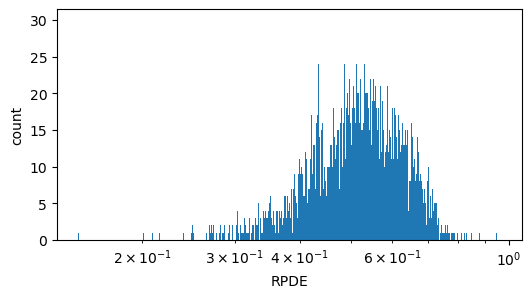

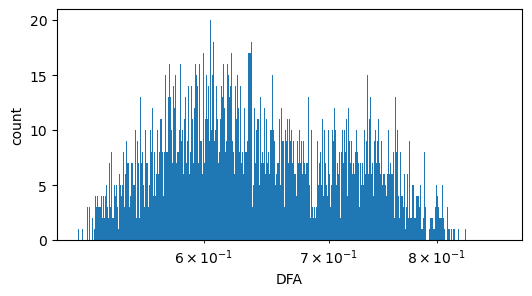

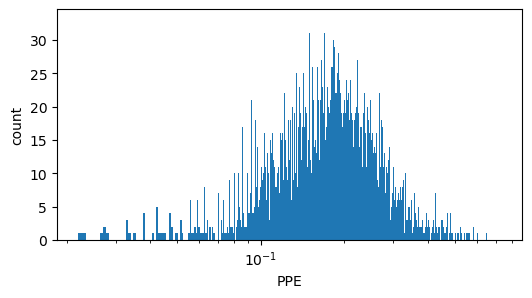

In [115]:
for i in ['Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP', 'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5','Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE']:
        plt.figure(figsize=(6, 3))
        plt.hist(df[i], bins=1000)
        plt.xlabel(i)
        plt.ylabel('count')
        plt.semilogx()

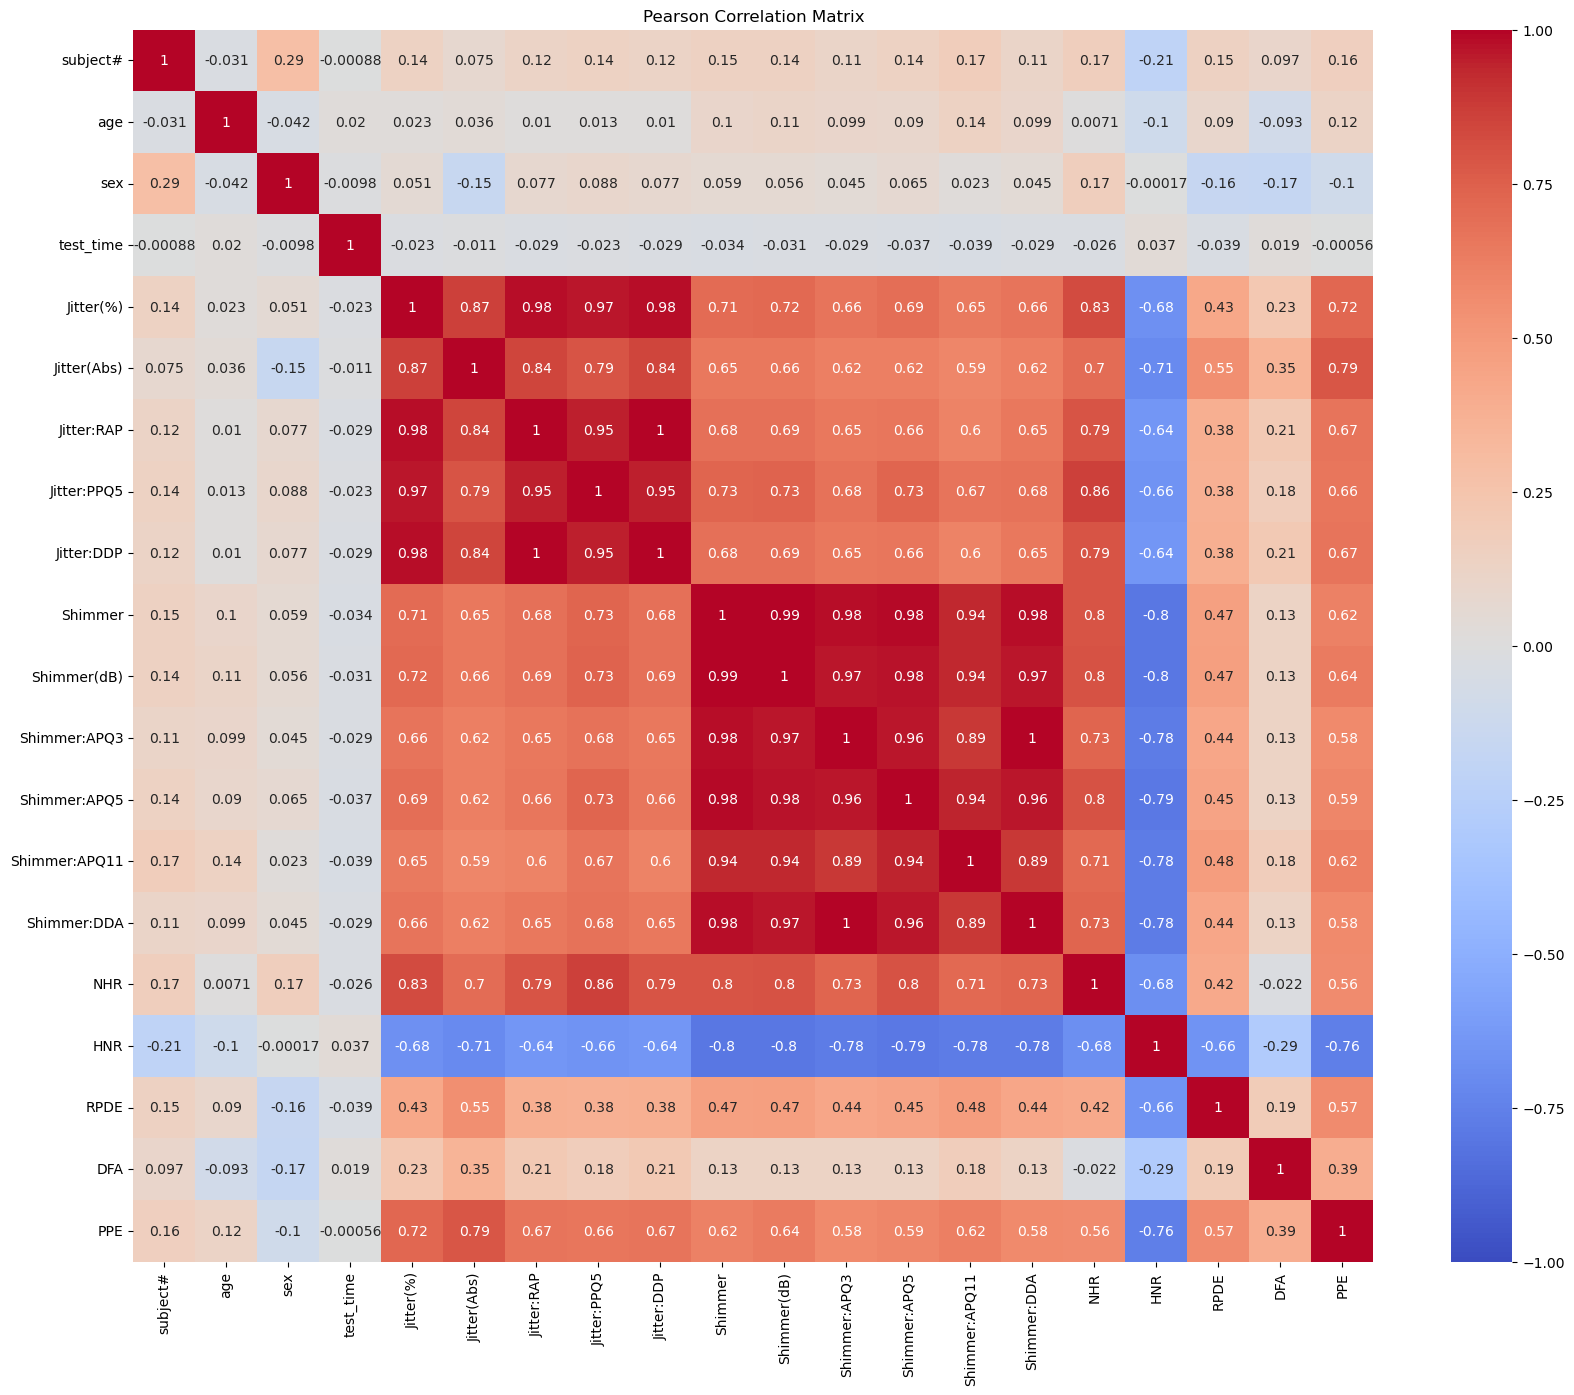

In [116]:
temp =df.drop(['motor_UPDRS', 'total_UPDRS'], axis=1)

plt.figure(figsize=(20, 16))
correlation_matrix = temp.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Pearson Correlation Matrix')
plt.show()

In [117]:
# choose total_UPDRS as my target variable
y = df[['total_UPDRS']]
X = df.drop(['test_time','motor_UPDRS', 'Jitter:RAP', 'Shimmer:APQ3'], axis=1)
print(y.head(5))
print(X.head(5))

   total_UPDRS
0       34.398
1       34.894
2       35.389
3       35.810
4       36.375
   subject#  age  sex  total_UPDRS  Jitter(%)  Jitter(Abs)  Jitter:PPQ5  \
0         1   72    0       34.398    0.00662     0.000034      0.00317   
1         1   72    0       34.894    0.00300     0.000017      0.00150   
2         1   72    0       35.389    0.00481     0.000025      0.00208   
3         1   72    0       35.810    0.00528     0.000027      0.00264   
4         1   72    0       36.375    0.00335     0.000020      0.00130   

   Jitter:DDP  Shimmer  Shimmer(dB)  Shimmer:APQ5  Shimmer:APQ11  Shimmer:DDA  \
0     0.01204  0.02565        0.230       0.01309        0.01662      0.04314   
1     0.00395  0.02024        0.179       0.01072        0.01689      0.02982   
2     0.00616  0.01675        0.181       0.00844        0.01458      0.02202   
3     0.00573  0.02309        0.327       0.01265        0.01963      0.03317   
4     0.00278  0.01703        0.176       0.00929     

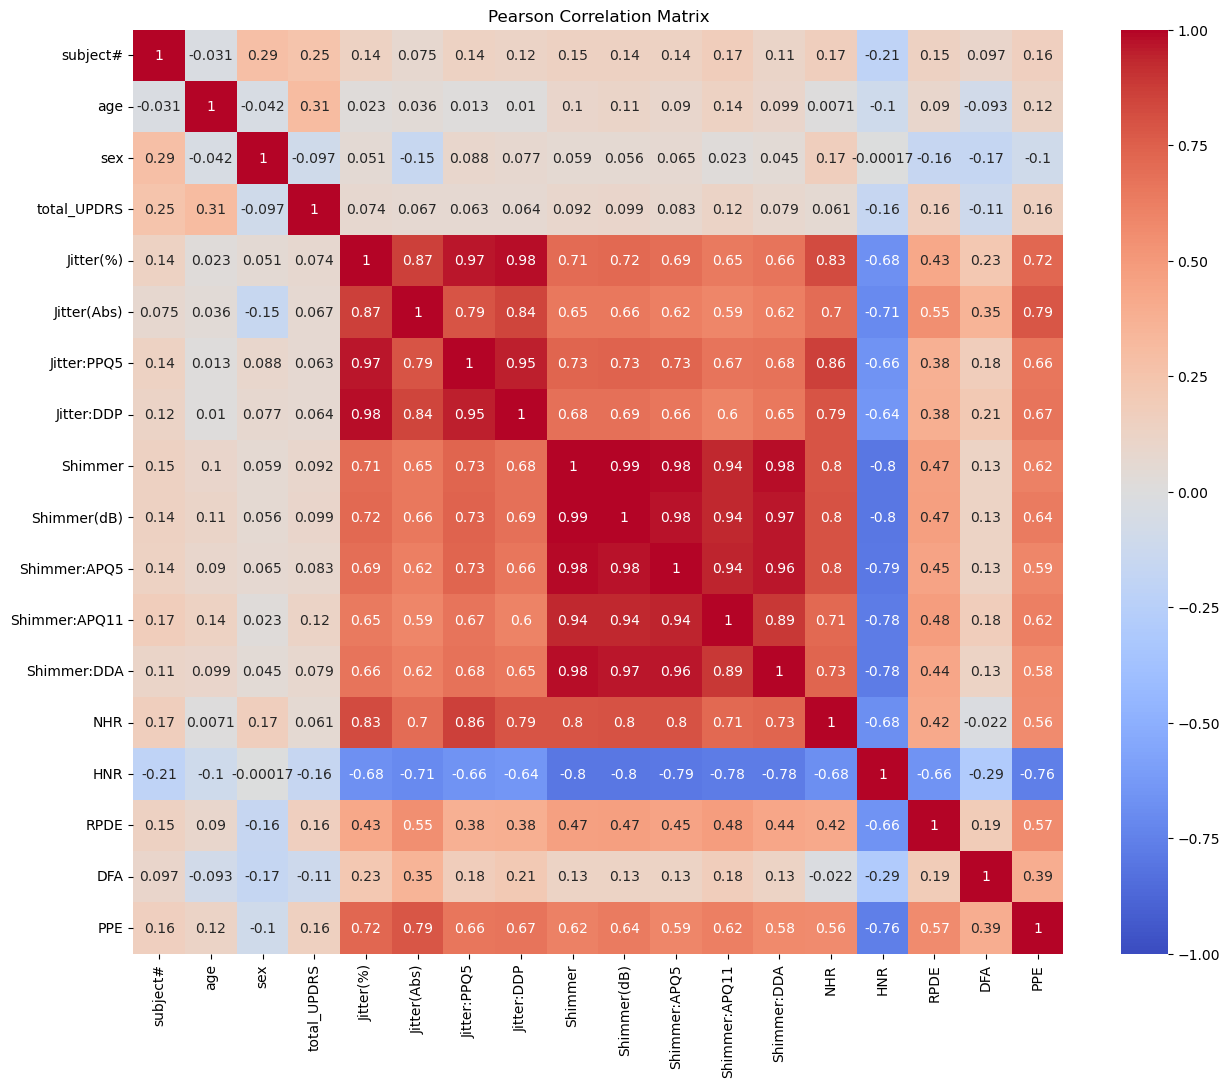

In [118]:
plt.figure(figsize=(15, 12))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Pearson Correlation Matrix')
plt.show()

In [119]:
groups = df['subject#']
# set out 20% of all data for the test set
splitter = GroupShuffleSplit(n_splits=1,test_size=0.2,random_state=2) 
for i_other, i_test in splitter.split(X, y, groups=groups): 
        X_other, y_other, groups_other = X.iloc[i_other], y.iloc[i_other], groups.iloc[i_other]
        X_test, y_test, groups_test = X.iloc[i_test], y.iloc[i_test], groups.iloc[i_test]

#perform k fold split on the rest of data to get train & val
kfold = GroupKFold(n_splits=4)
for train_index, test_index in kfold.split(X_other, y_other, groups=groups_other):
    X_train, X_val = X_other.iloc[train_index],  X_other.iloc[test_index]
    y_train, y_val = y_other.iloc[train_index], y_other.iloc[test_index]
    #print("a new fold")
    #print("TRAIN Index:", train_index, "TEST Index:", test_index)


print("checks on subjects:")
print("User in Test", np.unique(X_test['subject#']))
print("User IN TRAIN:" , np.unique(X_train['subject#']))
print("User IN VAL:",  np.unique(X_val['subject#']))
print("size of test:")
print(X_test.shape)
print("size of train:")
print(X_train.shape)
print("size of val:")
print(X_val.shape)
print(X_train.columns)


print(X_train.head(5))

checks on subjects:
User in Test [ 1  3 10 14 15 18 28 31 38]
User IN TRAIN: [ 2  4  5  6  9 11 12 13 16 17 20 22 24 25 27 29 30 32 33 35 36 37 40 41
 42]
User IN VAL: [ 7  8 19 21 23 26 34 39]
size of test:
(1259, 18)
size of train:
(3481, 18)
size of val:
(1135, 18)
Index(['subject#', 'age', 'sex', 'total_UPDRS', 'Jitter(%)', 'Jitter(Abs)',
       'Jitter:PPQ5', 'Jitter:DDP', 'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ5',
       'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE'],
      dtype='object')
     subject#  age  sex  total_UPDRS  Jitter(%)  Jitter(Abs)  Jitter:PPQ5  \
149         2   58    0       14.039    0.00600     0.000048      0.00294   
150         2   58    0       14.109    0.00810     0.000064      0.00457   
151         2   58    0       14.180    0.00804     0.000062      0.00435   
152         2   58    0       14.251    0.00680     0.000049      0.00319   
153         2   58    0       14.321    0.00375     0.000028      0.00209   

     Jitter:DDP 

In [134]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

col= ['total_UPDRS', 'Jitter(%)', 'Jitter(Abs)','Jitter:PPQ5', 'Jitter:DDP', 'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ5','Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE']     
scaler = StandardScaler()
for c in col:
    scaler.fit_transform(X_train[col])
    scaler.transform(X_test[col])
    scaler.transform(X_val[col])

scaler = MinMaxScaler()
scaler.fit_transform(pd.DataFrame(X_train['age']))

print(X_train)
 


#print(X_train)'''

      subject#       age  sex  total_UPDRS  Jitter(%)  Jitter(Abs)  \
149          2  0.448980    0    -1.342259  -0.037152     0.120659   
150          2  0.448980    0    -1.336274   0.315547     0.559411   
151          2  0.448980    0    -1.330203   0.305470     0.506297   
152          2  0.448980    0    -1.324133   0.097210     0.153431   
153          2  0.448980    0    -1.318147  -0.415043    -0.440706   
...        ...       ...  ...          ...        ...          ...   
5870        42  0.510204    0     0.320444  -0.362978    -0.362165   
5871        42  0.510204    0     0.277949  -0.546046    -0.544107   
5872        42  0.510204    0     0.235796  -0.458711    -0.543825   
5873        42  0.510204    0     0.194070  -0.572918    -0.667003   
5874        42  0.510204    0     0.151831  -0.571238    -0.645532   

      Jitter:PPQ5  Jitter:DDP   Shimmer  Shimmer(dB)  Shimmer:APQ5  \
149     -0.107128    0.000704  0.052860    -0.032823      0.126324   
150      0.273532  